# Importación y primer revisión de los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

agosto13 = pd.read_csv('1308.csv')
septiembre13 = pd.read_csv('1309.csv')
octubre13 = pd.read_csv('1310.csv')
noviembre13 = pd.read_csv('1311.csv')
diciembre13 = pd.read_csv('1312.csv')
enero14 = pd.read_csv('1401.csv')
febrero14 = pd.read_csv('1402.csv')
marzo14 = pd.read_csv('1403.csv')
abril14 = pd.read_csv('1404.csv')
mayo14 = pd.read_csv('1405.csv')
junio14 = pd.read_csv('1406.csv')
enero15 = pd.read_csv('1501.csv')
agosto15 = pd.read_csv('1508.csv')
marzo16 = pd.read_csv('1603.csv')
abril16 = pd.read_csv('1604.csv')
mayo16 = pd.read_csv('1605.csv')
junio16 = pd.read_csv('1606.csv')
enero17 = pd.read_csv('1701.csv')
agosto17 = pd.read_csv('1708.csv')

datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
                          junio16, enero17, agosto17])

datosForTesting = pd.read_csv('properati_dataset_testing_noprice.csv')
 

In [2]:
datosForTesting.count()

id                         14166
created_on                 14166
property_type              14166
operation                  14166
place_name                 14166
place_with_parent_names    14166
country_name               14166
state_name                 14166
lat-lon                    10487
lat                        10487
lon                        10487
surface_total_in_m2        11853
surface_covered_in_m2      13005
floor                       1368
rooms                       7500
expenses                    2543
description                14166
dtype: int64

Algunos primeros datos del set a testear. Vemos que los únicos campos con bajo porcentaje de datos son el piso y las expensas.

In [3]:
datos = datos.loc[:, ['id', 'created_on',  'property_type', 'operation', 'place_name', \
                      'place_with_parent_names', 'country_name', 'state_name', 'lat-lon', 'lat', 'lon', \
                     'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'description',\
                     'price_aprox_usd']]
datos.columns

Index([u'id', u'created_on', u'property_type', u'operation', u'place_name',
       u'place_with_parent_names', u'country_name', u'state_name', u'lat-lon',
       u'lat', u'lon', u'surface_total_in_m2', u'surface_covered_in_m2',
       u'floor', u'rooms', u'expenses', u'description', u'price_aprox_usd'],
      dtype='object')

In [4]:
print datosForTesting.operation.unique()

['venta' 'alquiler']


In [5]:
datosForTesting.loc[datosForTesting.operation == 'alquiler','id'].count()

1

In [6]:
print datos.operation.unique()

['sell']


In [7]:
datos['operation'] = datos['operation'].map(lambda x: 'venta' if x == 'sell' else 'alquiler')
datos.loc[datos.operation == 'venta', 'id'].count()

394859

In [8]:
print datosForTesting.property_type.unique()

['departamento' 'ph' 'casa']


In [9]:
datosForTesting.loc[datosForTesting.property_type == 'departamento', 'id'].count()

9761

In [10]:
print datos.property_type.unique()

['house' 'apartment' 'PH' 'store']


In [11]:
datos = datos.loc[datos.property_type != 'store', :]
datos.count()

id                          382226
created_on                 1101908
property_type              1101908
operation                  1101908
place_name                 1101851
place_with_parent_names    1101908
country_name                382226
state_name                  382226
lat-lon                     921414
lat                         921414
lon                         921403
surface_total_in_m2         254876
surface_covered_in_m2       307965
floor                       150100
rooms                       781325
expenses                     53797
description                 382210
price_aprox_usd             918368
dtype: int64

In [12]:
def traducirTipoPropiedad(x):
    tipo = ''
    if (x == 'house'):
        tipo = 'casa' 
    else:
        if (x == 'apartment'): 
            tipo = 'departamento'
        else: 
            if (x == 'PH'): 
                tipo = 'ph'
    return tipo        

In [13]:
datos['property_type'] = datos['property_type'].map(traducirTipoPropiedad)
datos.loc[datos.property_type == 'casa','id'].count()

144190

In [14]:
print datosForTesting.surface_total_in_m2.min()

0.0


In [15]:
print datosForTesting.surface_total_in_m2.max()

148000.0


In [16]:
print datos.loc[datos.surface_total_in_m2 > 150000, 'id'].count()

10


In [17]:
print datosForTesting.state_name.unique()

['Capital Federal' 'Buenos Aires Interior' 'Bs.As. G.B.A. Zona Sur'
 'Bs.As. G.B.A. Zona Oeste' 'Bs.As. G.B.A. Zona Norte']


In [18]:
print datosForTesting.loc[datosForTesting.state_name == 'Buenos Aires Interior', 'id'].count()

1


In [19]:
print datos.state_name.unique()

[nan 'Buenos Aires Interior' 'R\xc3\xado Negro' 'Capital Federal'
 'Buenos Aires Costa Atl\xc3\xa1ntica' 'Neuqu\xc3\xa9n' 'San Juan'
 'Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Sur'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Santa Fe' 'San Luis'
 'C\xc3\xb3rdoba' 'Entre R\xc3\xados' 'La Pampa' 'Salta' 'Tucum\xc3\xa1n'
 'Mendoza' 'Corrientes' 'Chaco' 'Jujuy' 'Catamarca' 'La Rioja' 'Chubut'
 'Formosa' 'Tierra Del Fuego' 'Santa Cruz' 'Santiago Del Estero']


In [20]:
datos = datos.loc[(datos['state_name'].str.contains('Capital Federal')| \
                   datos['state_name'].str.contains('Bs.As. G.B.A. Zona Sur')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Oeste')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Norte')),:]
datos.count()

id                         266059
created_on                 266059
property_type              266059
operation                  266059
place_name                 266002
place_with_parent_names    266059
country_name               266059
state_name                 266059
lat-lon                    183538
lat                        183538
lon                        183538
surface_total_in_m2        189874
surface_covered_in_m2      230103
floor                       34239
rooms                      139224
expenses                    32679
description                266048
price_aprox_usd            247383
dtype: int64

In [21]:
datos = datos.loc[datos['price_aprox_usd'].notnull(),:]
datos = datos.loc[datos['price_aprox_usd'] != 0,:]
datos.count()

id                         235455
created_on                 235455
property_type              235455
operation                  235455
place_name                 235398
place_with_parent_names    235455
country_name               235455
state_name                 235455
lat-lon                    161442
lat                        161442
lon                        161442
surface_total_in_m2        170226
surface_covered_in_m2      210078
floor                       32392
rooms                      121130
expenses                    31250
description                235444
price_aprox_usd            235455
dtype: int64

In [22]:
#One hot encoding para tipo de propiedad
datosForTesting['EsCasa'] = datosForTesting['property_type'].str.contains('casa')
datosForTesting['EsDpto'] = datosForTesting['property_type'].str.contains('departamento')
datosForTesting['EsPH'] = datosForTesting['property_type'].str.contains('ph')
datos['EsCasa'] = datos['property_type'].str.contains('casa')
datos['EsDpto'] = datos['property_type'].str.contains('departamento')
datos['EsPH'] = datos['property_type'].str.contains('ph')

# Primera prueba, palermo vs no-palermo

In [28]:
#Se hace la comparacion por lat, lon, superficie y superficie cubierta, tengo que quitar los nulls de esos campos
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]

#Luego de esos divido los que estan en palermo de los que no estan en palermo
datosPalermo = datosSinNull.loc[datosSinNull.place_name == 'Palermo', :]
datosNoPalermo = datosSinNull.loc[datosSinNull.place_name != 'Palermo', :]

#Divido al set de palermo en otros features y precios
datosPalermoFeatures = datosPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosPalermoPrecio = datosPalermo.loc[:, ['price_aprox_usd']]

#Divido al set que no es de palermo en otros features y precios
datosNoPalermoFeatures = datosNoPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosNoPalermoPrecio = datosNoPalermo.loc[:, ['price_aprox_usd']]

In [29]:
#Importo todas las librerias correspondientes a ML
#Para score
from sklearn.metrics import r2_score

#Para training y cross
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#Algoritmos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import gaussian_process
from sklearn import neural_network

#Pre-procesamiento
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

/home/leandro/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/home/leandro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


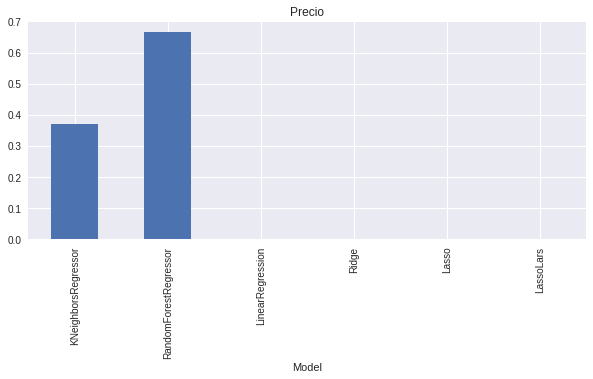

In [24]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         #RadiusNeighborsRegressor(),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1)]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

/home/leandro/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leandro/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


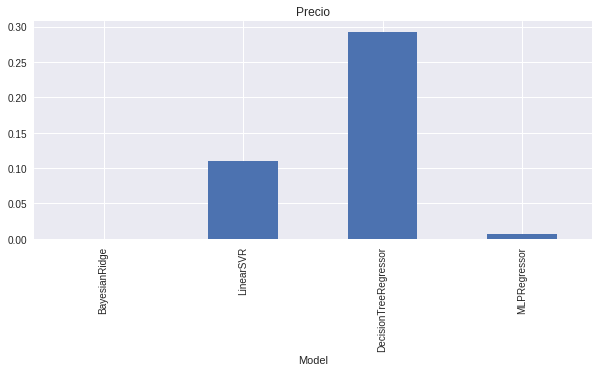

In [25]:
models = [linear_model.BayesianRidge(),
         #LogisticRegression(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         #gaussian_process.GaussianProcessRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

# Primera prueba con split del set de datos

In [113]:
#Split del set de datos prueba 1
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)

In [27]:
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]

/home/leandro/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


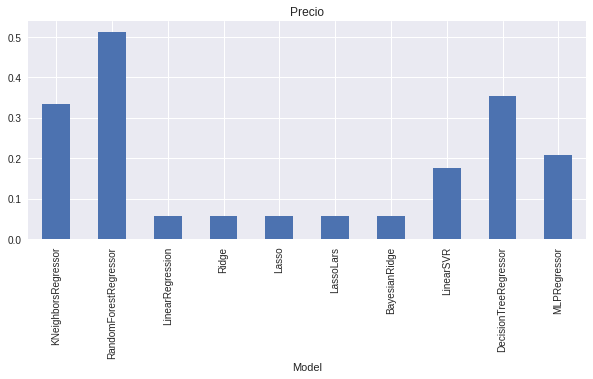

In [28]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

# Segunda prueba con split del set de datos

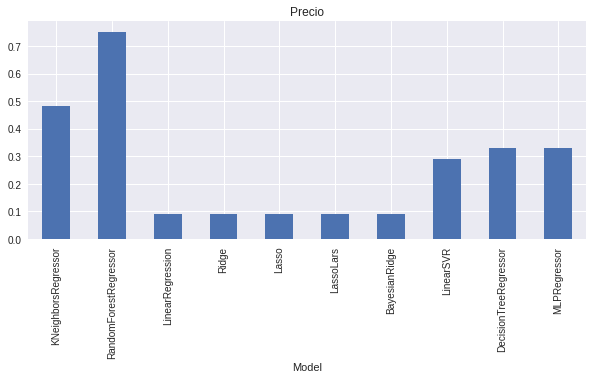

In [29]:
#Prueba 2
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

# Tercera prueba con split del set de datos

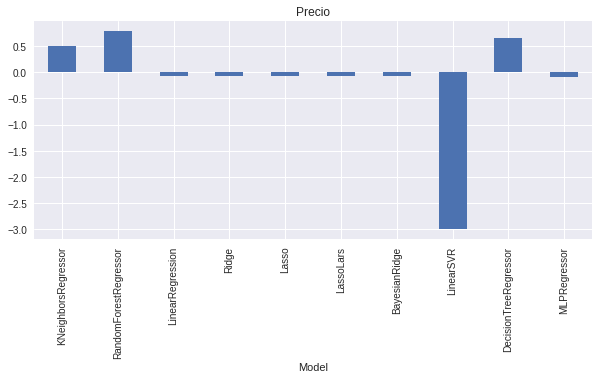

In [30]:
#Prueba 3
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

# Prueba de algoritmos para cross validation

In [26]:
datosFiltradosFeatures = datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosFiltradosPrecios = datosFiltrados.loc[:, ['price_aprox_usd']]

In [46]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.3193749 ,  0.90852784,  0.78727665,  0.74706295,  0.63907671])

In [50]:
RFRModel = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.2584208 ,  0.91204237,  0.77484542,  0.66607409,  0.63041404])

In [48]:
RFRModel = RandomForestRegressor()
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.25138166,  0.88470325,  0.59708272,  0.67097637,  0.60537916])

In [49]:
RFRModel = RandomForestRegressor(n_estimators=50, max_features=2)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.31663359,  0.90991187,  0.79368348,  0.74809686,  0.63274897])

In [27]:
KNModel = KNeighborsRegressor()
scores = cross_val_score(KNModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.12597074,  0.66072567,  0.53434287,  0.33816689,  0.33995825])

In [28]:
LRModel =  LinearRegression()
scores = cross_val_score(LRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores   

array([ 0.05307517,  0.08651263, -4.42961255,  0.05614155,  0.07385209])

In [29]:
model = linear_model.Ridge (alpha = .5)
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores     

array([ 0.05307517,  0.08651263, -4.42961247,  0.05614155,  0.07385209])

In [30]:
model = linear_model.Lasso (alpha = 0.1)
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores    

array([ 0.05307516,  0.08651264, -4.42961241,  0.05614154,  0.07385208])

In [31]:
model = linear_model.LassoLars (alpha = 0.1)
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores       

array([ 0.05305132,  0.08648995, -4.42775917,  0.05610655,  0.0738203 ])

In [32]:
model = model = linear_model.BayesianRidge()
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.05304556,  0.08654014, -4.42936656,  0.05613126,  0.07384101])

In [33]:
model = svm.LinearSVR()
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores    

array([-0.12259287,  0.43050573, -8.04071023,  0.28293144,  0.25297845])

In [ ]:
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores    

array([ 0.11624756,  0.85918756,  0.67822639,  0.35655586,  0.48230036])

In [ ]:
model = neural_network.MLPRegressor()
scores = cross_val_score(model, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

# Primera estimación al set de prueba

In [54]:
#primera estimacion al set de prueba
primeraPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [61]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(primeraPrueba)

array([[ -34.61098776,  -58.36346358,    0.        ,   64.        ],
       [ -34.612651  ,  -58.4432756 ,    0.        ,   64.        ],
       [ -34.58936332,  -58.41287986,   53.        ,   48.        ],
       ..., 
       [ -34.7585252 ,  -58.4097202 ,  219.        ,  135.        ],
       [ -34.56322108,  -58.46105268,   62.        ,   48.        ],
       [ -34.70919169,  -58.53028938,  367.        ,  130.        ]])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']], datosFiltrados['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba1 = RFRModel.predict(imp.fit_transform(primeraPrueba))
prueba1

array([ 307686.31166667,  159466.64      ,  185250.8197    , ...,
        167100.2048    ,  172813.33989524,  152105.        ])

In [79]:
archivo1 = pd.DataFrame()
archivo1['id'] = datosForTesting.loc[:,['id']]
archivo1['price_usd'] = prueba1
archivo1

,id,price_usd
0,3632,307686.311667
1,3633,159466.640000
2,2263404,185250.819700
3,2263405,83847.000000
4,2263406,141019.780741
5,2263407,83847.000000
6,2263408,83847.000000
7,2263409,83847.000000
8,2263410,139479.400000
9,2263411,109333.665000


In [85]:
archivo1.to_csv('prueba1.csv', index=False)

# Segunda estimación para el set de prueba

In [24]:
datosForTesting

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,EsCasa,EsDpto,EsPH
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...,False,True,False
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...,False,True,False
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...,False,True,False
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...,False,True,False
5,2263407,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False
6,2263408,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False
7,2263409,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False
8,2263410,2017-08-01,departamento,venta,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,"-34.5787213694,-58.4570952614",-34.578721,-58.457095,67.0,67.0,NaN,NaN,2600,EXCELENTE 2 AMB- APTO PROFESIO...,False,True,False
9,2263411,2017-08-01,departamento,venta,Almagro,|Argentina|Capital Federal|Almagro|,Argentina,Capital Federal,NaN,NaN,NaN,47.0,47.0,NaN,NaN,NaN,IMPECABLE MONOAMBIENTE- DIVISI...,False,True,False


In [36]:
#segunda estimacion al set de prueba
#En vez de filtrar los registros que tienen features con null, los relleno con la media
segundaPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
datosPrueba2 = datos.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [37]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
segundaPrueba = imp.fit_transform(segundaPrueba)
datosPrueba2 = imp.fit_transform(datosPrueba2)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(datosPrueba2, datos['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba2 = RFRModel.predict(imp.fit_transform(segundaPrueba))
prueba2

array([ 764114.61036667,  153507.45323333,  188584.3594    , ...,
        197195.94423333,  158283.73186667,  146931.5132    ])

In [39]:
archivo2 = pd.DataFrame()
archivo2['id'] = datosForTesting.loc[:,['id']]
archivo2['price_usd'] = prueba2
archivo2

,id,price_usd
0,3632,764114.610367
1,3633,153507.453233
2,2263404,188584.359400
3,2263405,85729.661806
4,2263406,137493.604332
5,2263407,85729.661806
6,2263408,85729.661806
7,2263409,85729.661806
8,2263410,172112.159600
9,2263411,110298.766667


In [46]:
archivo2.to_csv('prueba2.csv', index=False)

# Tercera estimación para el set de prueba

In [41]:
#No hubo mejoras con respecto a la prueba 1, vuelvo a filtrar los nulos
#tercera estimacion al set de prueba
terceraPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
datosPrueba3 = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

x_train, x_test, y_train, y_test = train_test_split(datosPrueba3, datosSinNull['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba3 = RFRModel.predict(imp.fit_transform(terceraPrueba))
prueba3

array([ 283678.67513333,  143203.75      ,  194269.04684286, ...,
        183050.4533    ,  157260.06666667,  140156.5872    ])

In [42]:
archivo3 = pd.DataFrame()
archivo3['id'] = datosForTesting.loc[:,['id']]
archivo3['price_usd'] = prueba3
archivo3

,id,price_usd
0,3632,283678.675133
1,3633,143203.750000
2,2263404,194269.046843
3,2263405,88199.400000
4,2263406,142612.473689
5,2263407,88199.400000
6,2263408,88199.400000
7,2263409,88199.400000
8,2263410,138190.000000
9,2263411,107376.110000


In [47]:
archivo3.to_csv('prueba3.csv', index=False)

In [44]:
archivo3.merge(archivo2, how='inner', left_on='id', right_on='id')

,id,price_usd_x,price_usd_y
0,3632,283678.675133,764114.610367
1,3633,143203.750000,153507.453233
2,2263404,194269.046843,188584.359400
3,2263405,88199.400000,85729.661806
4,2263406,142612.473689,137493.604332
5,2263407,88199.400000,85729.661806
6,2263408,88199.400000,85729.661806
7,2263409,88199.400000,85729.661806
8,2263410,138190.000000,172112.159600
9,2263411,107376.110000,110298.766667


# Cuarta estimación para el set de prueba

In [23]:
#Al no haber mejoras significativas voy a tratar de limpiar un poco mejor el set de datos de entrenamiento
def split_place_with_parent_names_localidad(x):
    z=x.split("|")
    return z[3]

datos['localidad'] = datos['place_with_parent_names'].map(split_place_with_parent_names_localidad)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235455 entries, 2 to 121219
Data columns (total 22 columns):
id                         235455 non-null object
created_on                 235455 non-null object
property_type              235455 non-null object
operation                  235455 non-null object
place_name                 235398 non-null object
place_with_parent_names    235455 non-null object
country_name               235455 non-null object
state_name                 235455 non-null object
lat-lon                    161442 non-null object
lat                        161442 non-null float64
lon                        161442 non-null float64
surface_total_in_m2        170226 non-null float64
surface_covered_in_m2      210078 non-null float64
floor                      32392 non-null float64
rooms                      121130 non-null float64
expenses                   31250 non-null object
description                235444 non-null object
price_aprox_usd            235455 n

In [24]:
datosForTesting['localidad'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_localidad)
datosForTesting.head(10)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,EsCasa,EsDpto,EsPH,localidad
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...,False,True,False,Puerto Madero
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...,False,True,False,
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...,False,True,False,Palermo
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False,Chacarita
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...,False,True,False,Chacarita
5,2263407,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False,Chacarita
6,2263408,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False,Chacarita
7,2263409,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,False,True,False,Chacarita
8,2263410,2017-08-01,departamento,venta,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,"-34.5787213694,-58.4570952614",-34.578721,...,67.0,67.0,NaN,NaN,2600,EXCELENTE 2 AMB- APTO PROFESIO...,False,True,False,Colegiales
9,2263411,2017-08-01,departamento,venta,Almagro,|Argentina|Capital Federal|Almagro|,Argentina,Capital Federal,NaN,NaN,...,47.0,47.0,NaN,NaN,NaN,IMPECABLE MONOAMBIENTE- DIVISI...,False,True,False,Almagro


In [25]:
localidades = datosForTesting.localidad.unique()
localidades.size

81

In [26]:
def localidadEnSet(x):
    return x in localidades.tolist()

In [30]:
datosSinNull['localidad'].unique().size

90

In [123]:
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]

datosSinNull['localidadEnSet'] = datosSinNull['localidad'].map(localidadEnSet)
datosPrueba4 = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]

#Resultados anteriores:
#array([ 0.3193749 ,  0.90852784,  0.78727665,  0.74706295,  0.63907671])
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))
scores = cross_val_score(RFRModel, datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], np.ravel(datosPrueba4['price_aprox_usd']), cv=5)
scores

array([ 0.296028  ,  0.9636712 ,  0.88793072,  0.78453703,  0.63062925])

In [60]:
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=150))
scores = cross_val_score(RFRModel, datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], np.ravel(datosPrueba4['price_aprox_usd']), cv=10)
scores

array([ 0.2185931 ,  0.22619475,  0.97485149,  0.9886908 ,  0.9592906 ,
        0.80139902,  0.72820484,  0.77683026,  0.61730065,  0.09252109])

In [70]:
datosForTesting['surface_total_in_m2'].describe()

count     11853.000000
mean        156.531342
std        1459.053368
min           0.000000
25%          46.000000
50%          72.000000
75%         145.000000
max      148000.000000
Name: surface_total_in_m2, dtype: float64

In [72]:
datosPrueba4['surface_total_in_m2'].describe()

count     85416.000000
mean        141.817095
std         974.671950
min           0.000000
25%          44.000000
50%          72.000000
75%         150.000000
max      192014.000000
Name: surface_total_in_m2, dtype: float64

In [75]:
datosPrueba4 = datosPrueba4.loc[datosPrueba4['surface_total_in_m2'] < 150000, :]
datosPrueba4['surface_total_in_m2'].describe()

count     85415.000000
mean        139.570743
std         720.398443
min           0.000000
25%          44.000000
50%          72.000000
75%         150.000000
max      100000.000000
Name: surface_total_in_m2, dtype: float64

In [76]:
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))
scores = cross_val_score(RFRModel, datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], np.ravel(datosPrueba4['price_aprox_usd']), cv=5)
scores

array([ 0.29365007,  0.96307568,  0.8786421 ,  0.77538008,  0.62350672])

In [78]:
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=150, max_features='sqrt'))
scores = cross_val_score(RFRModel, datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], np.ravel(datosPrueba4['price_aprox_usd']), cv=5)
scores

array([ 0.29879945,  0.96539348,  0.8817702 ,  0.77632032,  0.62764425])

In [80]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
cuartaPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH']]
x_train, x_test, y_train, y_test = train_test_split(datosPrueba4.loc[:,['lat', 'lon', 'surface_total_in_m2', \
                            'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], datosPrueba4['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba4 = RFRModel.predict(imp.fit_transform(cuartaPrueba))
prueba4

array([ 303813.4022    ,  165055.39826667,  195404.93293535, ...,
        173373.002     ,  167780.92523077,  153513.06966667])

In [82]:
archivo4 = pd.DataFrame()
archivo4['id'] = datosForTesting.loc[:,['id']]
archivo4['price_usd'] = prueba4
archivo4
archivo4.to_csv('prueba4.csv', index=False)

# Quinta estimación para el set de prueba

In [105]:
#Creamos un place_name_id para agregar a la query
barrios = pd.concat([pd.DataFrame([[barrio,0]], columns=['place_name','place_name_id']) for barrio in datosSinNull['place_name'].unique()]).reset_index()
barrios['place_name_id'] = barrios.index
barrios = barrios.loc[:,['place_name','place_name_id']]
barrios.head()

,place_name,place_name_id
0,Jose Marmol,0
1,Belgrano,1
2,Palermo Soho,2
3,Burzaco,3
4,Villa Devoto,4


In [103]:
def aBinario(x):
    return 1 if x == True else 0

In [106]:
datosWithPlaces = pd.merge(datosSinNull,barrios,how='left',on='place_name')
datosFiltradosWithPlaces = datosWithPlaces.loc[:, ['lat', \
                           'lon','surface_covered_in_m2','surface_total_in_m2',\
                           'price_aprox_usd', 'place_name_id', 'EsCasa', 'EsDpto', 'EsPH']]

datosFiltradosWithPlacesFeatures = datosFiltradosWithPlaces.loc[:, ['lat', 'lon','surface_covered_in_m2','surface_total_in_m2',\
                                              'place_name_id', 'EsCasa', 'EsDpto', 'EsPH']]
datosFiltradosWithPlacesPrecios = datosFiltradosWithPlaces.loc[:, ['price_aprox_usd']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

scores = cross_val_score(RFRModel, datosFiltradosWithPlacesFeatures, np.ravel(datosFiltradosWithPlacesPrecios), cv=5)

scores

array([ 0.33923073,  0.92638823,  0.83930608,  0.80141938,  0.64464793])

In [107]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
quintaPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa',\
                                       'EsDpto', 'EsPH', 'place_name_id']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithPlaces.loc[:, \
             ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'EsCasa', 'EsDpto', 'EsPH']], \
                                                    datosFiltradosWithPlaces['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba5 = RFRModel.predict(imp.fit_transform(quintaPrueba))

prueba5

array([ 310359.12573333,  167227.13851111,  190391.08388889, ...,
        183366.6521    ,  166948.15342381,  165198.6461    ])

In [108]:
archivo5 = pd.DataFrame()
archivo5['id'] = datosForTesting.loc[:,['id']]
archivo5['price_usd'] = prueba5
archivo5
archivo5.to_csv('prueba5.csv', index=False)

# Sexta estimación al set de prueba

In [31]:
def split_place_with_parent_names_zona(x):
    z=x.split("|")
    return z[2]

datos['zona'] = datos['place_with_parent_names'].map(split_place_with_parent_names_zona)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235455 entries, 2 to 121219
Data columns (total 23 columns):
id                         235455 non-null object
created_on                 235455 non-null object
property_type              235455 non-null object
operation                  235455 non-null object
place_name                 235398 non-null object
place_with_parent_names    235455 non-null object
country_name               235455 non-null object
state_name                 235455 non-null object
lat-lon                    161442 non-null object
lat                        161442 non-null float64
lon                        161442 non-null float64
surface_total_in_m2        170226 non-null float64
surface_covered_in_m2      210078 non-null float64
floor                      32392 non-null float64
rooms                      121130 non-null float64
expenses                   31250 non-null object
description                235444 non-null object
price_aprox_usd            235455 n

In [32]:
#Saco nulos
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['price_aprox_usd'].notnull(),:]

#Me quedo solo con los que tienen la localidad en el set de datos
datosSinNull['localidadEnSet'] = datosSinNull['localidad'].map(localidadEnSet)
datosPrueba6 = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]
datosPrueba6.columns

Index([u'id', u'created_on', u'property_type', u'operation', u'place_name',
       u'place_with_parent_names', u'country_name', u'state_name', u'lat-lon',
       u'lat', u'lon', u'surface_total_in_m2', u'surface_covered_in_m2',
       u'floor', u'rooms', u'expenses', u'description', u'price_aprox_usd',
       u'EsCasa', u'EsDpto', u'EsPH', u'localidad', u'zona',
       u'localidadEnSet'],
      dtype='object')

In [76]:
datosPrueba6.head(1)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,rooms,expenses,description,price_aprox_usd,EsCasa,EsDpto,EsPH,localidad,zona,localidadEnSet
12,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,sell,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,NaN,NaN,CODIGO: 1520-MYR1925 ubicado en: Ferre 600 - ...,450000.0,True,False,False,Almirante Brown,Bs.As. G.B.A. Zona Sur,True


In [88]:
prueba6Campos = datosPrueba6.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                               'EsCasa', 'EsDpto', 'EsPH']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, prueba6Campos, np.ravel(datosPrueba6['price_aprox_usd']), cv=5)
scores

array([ 0.27221181,  0.85298427,  0.82378784,  0.71032257,  0.61512743])

In [89]:
datosPrueba6['localidad'].unique()

array(['Almirante Brown', 'Belgrano', 'Palermo', 'Villa Devoto', 'Flores',
       'Floresta', 'General San Mart\xc3\xadn', 'Tres de Febrero',
       'Balvanera', 'Esteban Echeverr\xc3\xada', 'Mor\xc3\xb3n', 'Quilmes',
       'La Matanza', 'Berazategui', 'Vicente L\xc3\xb3pez',
       'Parque Patricios', 'Congreso', 'Almagro', 'Villa Crespo',
       'Villa Luro', 'Coghlan', 'Parque Centenario', 'Lomas de Zamora',
       'Barrio Norte', 'Ituzaing\xc3\xb3', 'Lan\xc3\xbas', 'Hurlingham',
       'La Plata', 'Chacarita', 'Recoleta', 'San Telmo', 'Once',
       'Mataderos', 'Villa Urquiza', 'Villa Lugano', 'Liniers',
       'Parque Chacabuco', 'Nu\xc3\xb1ez', 'Villa Ortuzar', 'Moreno',
       'Tribunales', 'Caballito', 'Avellaneda', 'Villa del Parque',
       'Barracas', 'San Cristobal', 'Boedo', 'Monserrat',
       'General Rodr\xc3\xadguez', 'Florencio Varela', 'Ezeiza', 'Boca',
       'Marcos Paz', 'Villa Pueyrred\xc3\xb3n', 'Villa Real',
       'Centro / Microcentro', 'Colegiales', 'Saave

In [33]:
#Creamos un place_name_id para agregar a la query
barrios = pd.concat([pd.DataFrame([[barrio,0]], columns=['localidad','localidad_id']) for barrio in datosPrueba6['localidad'].unique()]).reset_index()
barrios['localidad_id'] = barrios.index
barrios = barrios.loc[:,['localidad','localidad_id']]

In [34]:
#Agregamos el id del barrio al set de entrenamiento
datosPrueba6 = pd.merge(datosPrueba6,barrios,how='left',on='localidad')
datosPrueba6.head(2)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,expenses,description,price_aprox_usd,EsCasa,EsDpto,EsPH,localidad,zona,localidadEnSet,localidad_id
0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,venta,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,NaN,CODIGO: 1520-MYR1925 ubicado en: Ferre 600 - ...,450000.0,True,False,False,Almirante Brown,Bs.As. G.B.A. Zona Sur,True,0
1,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,2014-07-02,departamento,venta,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.55814,-58.4614942",-34.558140,...,700,CODIGO: ubicado en: Roosevelt 2500 - Publica...,96000.0,False,True,False,Belgrano,Capital Federal,True,1


In [92]:
prueba6Campos = datosPrueba6.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, prueba6Campos, np.ravel(datosPrueba6['price_aprox_usd']), cv=5)
scores

array([ 0.26698414,  0.84929376,  0.83497617,  0.72720624,  0.61971322])

In [35]:
#One hot encoding para zona
datosPrueba6.head(5)
datosPrueba6['EsCap'] = datosPrueba6['zona'].str.contains('Capital Federal')
datosPrueba6['EsSur'] = datosPrueba6['zona'].str.contains('Bs.As. G.B.A. Zona Sur')
datosPrueba6['EsNor'] = datosPrueba6['zona'].str.contains('Bs.As. G.B.A. Zona Norte')
datosPrueba6['EsOes'] = datosPrueba6['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')
datosPrueba6.columns

Index([u'id', u'created_on', u'property_type', u'operation', u'place_name',
       u'place_with_parent_names', u'country_name', u'state_name', u'lat-lon',
       u'lat', u'lon', u'surface_total_in_m2', u'surface_covered_in_m2',
       u'floor', u'rooms', u'expenses', u'description', u'price_aprox_usd',
       u'EsCasa', u'EsDpto', u'EsPH', u'localidad', u'zona', u'localidadEnSet',
       u'localidad_id', u'EsCap', u'EsSur', u'EsNor', u'EsOes'],
      dtype='object')

In [95]:
prueba6Campos = datosPrueba6.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, prueba6Campos, np.ravel(datosPrueba6['price_aprox_usd']), cv=5)
scores

array([ 0.27923898,  0.8549949 ,  0.82265901,  0.72303181,  0.62230091])

In [96]:
datosPrueba6['fecha'] = pd.to_datetime(datosPrueba6['created_on'], errors='coerce')
datosPrueba6['mes'] = datosPrueba6['fecha'].dt.month
datosPrueba6['año'] = datosPrueba6['fecha'].dt.year

In [98]:
#Filtro fechas para acotar un poco el set de datos y probar por años
datosPrueba2014 = datosPrueba6.loc[datosPrueba6['año'] == 2014, :]
datosPrueba2014Campos = datosPrueba2014.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba2014Campos, np.ravel(datosPrueba2014['price_aprox_usd']), cv=5)
scores

array([ 0.53408701,  0.10294232,  0.55021047,  0.52099917,  0.39778487])

In [99]:
datosPrueba2015 = datosPrueba6.loc[datosPrueba6['año'] == 2015, :]
datosPrueba2015Campos = datosPrueba2015.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba2015Campos, np.ravel(datosPrueba2015['price_aprox_usd']), cv=5)
scores

array([ 0.44372747,  0.12892299,  0.55859123,  0.92871696,  0.9167423 ])

In [100]:
datosPrueba2016 = datosPrueba6.loc[datosPrueba6['año'] == 2016, :]
datosPrueba2016Campos = datosPrueba2016.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba2016Campos, np.ravel(datosPrueba2016['price_aprox_usd']), cv=5)
scores

array([ 0.93170413,  0.96658221,  0.84844674,  0.67927937,  0.63995407])

In [101]:
datosPrueba2017 = datosPrueba6.loc[datosPrueba6['año'] == 2017, :]
datosPrueba2017Campos = datosPrueba2017.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba2017Campos, np.ravel(datosPrueba2017['price_aprox_usd']), cv=5)
scores

array([ 0.72878998,  0.61210599,  0.66881108,  0.60888805,  0.60317748])

In [104]:
datosPruebaMezcla = datosPrueba6.loc[((datosPrueba6['año'] == 2015) & (datosPrueba6['mes'] >5 )) | \
                                     ((datosPrueba6['año'] == 2016) & (datosPrueba6['mes'] < 6)), :]
datosPruebaMezclaCampos = datosPruebaMezcla.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPruebaMezclaCampos, np.ravel(datosPruebaMezcla['price_aprox_usd']), cv=5)
scores

array([ 0.60198194,  0.96715688,  0.97037669,  0.98412795,  0.97970192])

In [105]:
datosPruebaMezcla2 = datosPrueba6.loc[((datosPrueba6['año'] == 2015) & (datosPrueba6['mes'] > 8 )) | \
                                     ((datosPrueba6['año'] == 2016) & (datosPrueba6['mes'] < 6)), :]
datosPruebaMezcla2Campos = datosPruebaMezcla2.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPruebaMezcla2Campos, np.ravel(datosPruebaMezcla2['price_aprox_usd']), cv=5)
scores

array([ 0.92142154,  0.96498117,  0.98735734,  0.97931161,  0.98511398])

In [37]:
datosForTesting = pd.read_csv('properati_dataset_testing_noprice.csv')
datosForTesting.columns

Index([u'id', u'created_on', u'property_type', u'operation', u'place_name',
       u'place_with_parent_names', u'country_name', u'state_name', u'lat-lon',
       u'lat', u'lon', u'surface_total_in_m2', u'surface_covered_in_m2',
       u'floor', u'rooms', u'expenses', u'description'],
      dtype='object')

In [38]:
datosForTesting['zona'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_zona)
datosForTesting['localidad'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_localidad)
datosForTesting.head(5)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,zona,localidad
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...,Capital Federal,Puerto Madero
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...,Buenos Aires Interior,
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...,Capital Federal,Palermo
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...,Capital Federal,Chacarita
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...,Capital Federal,Chacarita


In [39]:
datosForTesting = pd.merge(datosForTesting,barrios,how='left',on='localidad')

In [40]:
datosForTesting['zona'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_zona)
datosForTesting['EsCap'] = datosForTesting['zona'].str.contains('Capital Federal')
datosForTesting['EsSur'] = datosForTesting['zona'].str.contains('Bs.As. G.B.A. Zona Sur')
datosForTesting['EsNor'] = datosForTesting['zona'].str.contains('Bs.As. G.B.A. Zona Norte')
datosForTesting['EsOes'] = datosForTesting['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')
datosForTesting['EsCasa'] = datosForTesting['property_type'].str.contains('casa')
datosForTesting['EsDpto'] = datosForTesting['property_type'].str.contains('departamento')
datosForTesting['EsPH'] = datosForTesting['property_type'].str.contains('ph')
datosForTesting.head(5)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,zona,localidad,localidad_id,EsCap,EsSur,EsNor,EsOes,EsCasa,EsDpto,EsPH
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,Capital Federal,Puerto Madero,60,True,False,False,False,False,True,False
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,...,Buenos Aires Interior,,71,False,False,False,False,False,True,False
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,Capital Federal,Palermo,2,True,False,False,False,False,True,False
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,Capital Federal,Chacarita,28,True,False,False,False,False,True,False
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,Capital Federal,Chacarita,28,True,False,False,False,False,True,False


In [129]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
sextaPrueba = datosForTesting.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

x_train, x_test, y_train, y_test = train_test_split(datosPruebaMezcla2Campos, \
                                                    np.ravel(datosPruebaMezcla2['price_aprox_usd']), test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba6 = RFRModel.predict(imp.fit_transform(sextaPrueba))

prueba6

array([ 385757.50362222,  117806.3187    ,  207822.06666667, ...,
        165688.3127    ,  113074.19809524,  225100.        ])

In [130]:
archivo6 = pd.DataFrame()
archivo6['id'] = datosForTesting.loc[:,['id']]
archivo6['price_usd'] = prueba6
archivo6
archivo6.to_csv('prueba6.csv', index=False)
#Overfitting

# Septima estimacion

In [41]:
datosSinNull.localidad = datosSinNull.localidad.str.upper()
datosSinNull.localidad = datosSinNull.localidad.str.replace('Á','A')
datosSinNull.localidad = datosSinNull.localidad.str.replace('É','E')
datosSinNull.localidad = datosSinNull.localidad.str.replace('Í','I')
datosSinNull.localidad = datosSinNull.localidad.str.replace('Ó','O')
datosSinNull.localidad = datosSinNull.localidad.str.replace('Ú','U')
datosSinNull.localidad = datosSinNull.localidad.str.replace('Ñ','N')

In [42]:
datosForTesting.localidad = datosForTesting.localidad.str.upper()
datosForTesting.localidad = datosForTesting.localidad.str.replace('Á','A')
datosForTesting.localidad = datosForTesting.localidad.str.replace('É','E')
datosForTesting.localidad = datosForTesting.localidad.str.replace('Í','I')
datosForTesting.localidad = datosForTesting.localidad.str.replace('Ó','O')
datosForTesting.localidad = datosForTesting.localidad.str.replace('Ú','U')
datosForTesting.localidad = datosForTesting.localidad.str.replace('Ñ','N')
datosForTesting.localidad.unique()

array(['PUERTO MADERO', '', 'PALERMO', 'CHACARITA', 'COLEGIALES',
       'ALMAGRO', 'BELGRANO', 'VILLA CRESPO', 'CABALLITO', 'BOEDO',
       'PARQUE PATRICIOS', 'RECOLETA', 'LOMAS DE ZAMORA', 'FLORES',
       'LA PLATA', 'NU\xc3\xb1EZ', 'MATADEROS', 'MOR\xc3\xb3N',
       'MONSERRAT', 'TRES DE FEBRERO', 'BOCA', 'BERAZATEGUI',
       'VILLA URQUIZA', 'ESTEBAN ECHEVERR\xc3\xadA', 'VILLA LURO',
       'COGHLAN', 'BARRIO NORTE', 'VILLA DEVOTO', 'BARRACAS',
       'LAS CA\xc3\xb1ITAS', 'PATERNAL', 'AVELLANEDA', 'LA MATANZA',
       'MONTE CASTRO', 'RETIRO', 'VILLA PUEYRRED\xc3\xb3N',
       'PARQUE CHACABUCO', 'LAN\xc3\xbaS', 'MORENO', 'LINIERS', 'CONGRESO',
       'CENTRO / MICROCENTRO', 'VILLA LUGANO', 'PARQUE AVELLANEDA',
       'SAN CRISTOBAL', 'POMPEYA', 'ALMIRANTE BROWN', 'SAAVEDRA',
       'ITUZAING\xc3\xb3', 'TRIBUNALES', 'VILLA ORTUZAR', 'BALVANERA',
       'ONCE', 'QUILMES', 'SAN NICOL\xc3\xa1S', 'CONSTITUCI\xc3\xb3N',
       'FLORESTA', 'EZEIZA', 'VILLA DEL PARQUE', 'VILLA SANTA 

In [44]:
datosPrueba7 = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]
datosPrueba7 = pd.merge(datosPrueba7,barrios,how='left',on='localidad')
datosPrueba7['EsCap'] = datosPrueba7['zona'].str.contains('Capital Federal')
datosPrueba7['EsSur'] = datosPrueba7['zona'].str.contains('Bs.As. G.B.A. Zona Sur')
datosPrueba7['EsNor'] = datosPrueba7['zona'].str.contains('Bs.As. G.B.A. Zona Norte')
datosPrueba7['EsOes'] = datosPrueba7['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')
datosPrueba7.head(5)

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,EsDpto,EsPH,localidad,zona,localidadEnSet,localidad_id,EsCap,EsSur,EsNor,EsOes
0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,venta,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,False,False,ALMIRANTE BROWN,Bs.As. G.B.A. Zona Sur,True,NaN,False,True,False,False
1,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,2014-07-02,departamento,venta,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.55814,-58.4614942",-34.558140,...,True,False,BELGRANO,Capital Federal,True,NaN,True,False,False,False
2,1e0ec350dd33b32977e6da279fdd9e4ebf870d0d,2014-07-02,ph,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5881288,-58.4331522",-34.588129,...,False,True,PALERMO,Capital Federal,True,NaN,True,False,False,False
3,d8470085f8f543f16e0d28b7f38fb2354ab9ce92,2014-07-02,casa,venta,Burzaco,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.8273730973,-58.3935291244",-34.827373,...,False,False,ALMIRANTE BROWN,Bs.As. G.B.A. Zona Sur,True,NaN,False,True,False,False
4,4efac79c0ede6d23f5ef3f9b57096fd6ef503cb0,2014-07-02,departamento,venta,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,"-34.5911545,-58.5101735",-34.591155,...,True,False,VILLA DEVOTO,Capital Federal,True,NaN,True,False,False,False


In [45]:
barrios = pd.concat([pd.DataFrame([[barrio,0]], columns=['localidad','localidad_id']) for barrio in datosPrueba7['localidad'].unique()]).reset_index()
barrios['localidad_id'] = barrios.index
barrios = barrios.loc[:,['localidad','localidad_id']]

In [56]:
datosPrueba7['clave'] = datosPrueba7.property_type + ' - ' + datosPrueba7.localidad
datosPrueba7.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,price_aprox_usd,localidad,zona,localidadEnSet,localidad_id,EsCap,EsSur,EsNor,EsOes,clave
0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,venta,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,450000.0,ALMIRANTE BROWN,Bs.As. G.B.A. Zona Sur,True,NaN,False,True,False,False,casa - ALMIRANTE BROWN
1,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,2014-07-02,departamento,venta,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.55814,-58.4614942",-34.558140,...,96000.0,BELGRANO,Capital Federal,True,NaN,True,False,False,False,departamento - BELGRANO
2,1e0ec350dd33b32977e6da279fdd9e4ebf870d0d,2014-07-02,ph,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5881288,-58.4331522",-34.588129,...,120000.0,PALERMO,Capital Federal,True,NaN,True,False,False,False,ph - PALERMO
3,d8470085f8f543f16e0d28b7f38fb2354ab9ce92,2014-07-02,casa,venta,Burzaco,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.8273730973,-58.3935291244",-34.827373,...,300000.0,ALMIRANTE BROWN,Bs.As. G.B.A. Zona Sur,True,NaN,False,True,False,False,casa - ALMIRANTE BROWN
4,4efac79c0ede6d23f5ef3f9b57096fd6ef503cb0,2014-07-02,departamento,venta,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,"-34.5911545,-58.5101735",-34.591155,...,155000.0,VILLA DEVOTO,Capital Federal,True,NaN,True,False,False,False,departamento - VILLA DEVOTO


In [46]:
datosForTesting['clave'] = datosForTesting.property_type + ' - ' + datosForTesting.localidad
claves = datosForTesting['clave'].unique()
print claves

['departamento - PUERTO MADERO' 'departamento - ' 'departamento - PALERMO'
 'departamento - CHACARITA' 'departamento - COLEGIALES'
 'departamento - ALMAGRO' 'departamento - BELGRANO'
 'departamento - VILLA CRESPO' 'departamento - CABALLITO' 'ph - BOEDO'
 'ph - PARQUE PATRICIOS' 'departamento - RECOLETA' 'casa - LOMAS DE ZAMORA'
 'departamento - FLORES' 'ph - FLORES' 'departamento - LA PLATA'
 'casa - NU\xc3\xb1EZ' 'departamento - MATADEROS' 'casa - MOR\xc3\xb3N'
 'casa - ' 'departamento - MONSERRAT' 'departamento - TRES DE FEBRERO'
 'departamento - BOCA' 'casa - LA PLATA' 'ph - LA PLATA'
 'departamento - BOEDO' 'ph - LOMAS DE ZAMORA' 'casa - BERAZATEGUI'
 'departamento - VILLA URQUIZA' 'departamento - LOMAS DE ZAMORA'
 'departamento - ESTEBAN ECHEVERR\xc3\xadA' 'departamento - VILLA LURO'
 'departamento - COGHLAN' 'ph - MATADEROS' 'ph - '
 'departamento - BARRIO NORTE' 'casa - BELGRANO' 'ph - VILLA URQUIZA'
 'casa - VILLA DEVOTO' 'departamento - BARRACAS'
 'departamento - LAS CA\xc3\xb

In [47]:
def claveEnSet(x):
    return x in claves.tolist()

In [58]:
datosPrueba7['claveEnSet'] = datosPrueba7['clave'].map(claveEnSet)
datosPrueba7.count()

id                         89689
created_on                 89689
property_type              89689
operation                  89689
place_name                 89689
place_with_parent_names    89689
country_name               89689
state_name                 89689
lat-lon                    89689
lat                        89689
lon                        89689
surface_total_in_m2        89689
surface_covered_in_m2      89689
floor                      13238
rooms                      60667
expenses                   19989
description                89686
price_aprox_usd            89689
localidad                  89689
zona                       89689
localidadEnSet             89689
localidad_id                1493
EsCap                      89689
EsSur                      89689
EsNor                      89689
EsOes                      89689
clave                      89689
claveEnSet                 89689
dtype: int64

In [59]:
datosPrueba7 = datosPrueba7.loc[datosPrueba7.claveEnSet == True, :]
datosPrueba7.count()

id                         84055
created_on                 84055
property_type              84055
operation                  84055
place_name                 84055
place_with_parent_names    84055
country_name               84055
state_name                 84055
lat-lon                    84055
lat                        84055
lon                        84055
surface_total_in_m2        84055
surface_covered_in_m2      84055
floor                      12933
rooms                      56955
expenses                   19527
description                84052
price_aprox_usd            84055
localidad                  84055
zona                       84055
localidadEnSet             84055
localidad_id                1493
EsCap                      84055
EsSur                      84055
EsNor                      84055
EsOes                      84055
clave                      84055
claveEnSet                 84055
dtype: int64

In [166]:
datosPrueba7Campos = datosPrueba7.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba7Campos, np.ravel(datosPrueba7['price_aprox_usd']), cv=5)
scores

array([ 0.21995719,  0.87315864,  0.85132794,  0.76792031,  0.61394706])

In [167]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
septimaPrueba = datosForTesting.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes']]

x_train, x_test, y_train, y_test = train_test_split(datosPrueba7Campos, \
                                                    np.ravel(datosPrueba7['price_aprox_usd']), test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba7 = RFRModel.predict(imp.fit_transform(septimaPrueba))

prueba7

array([ 310442.88223333,  121478.7109    ,  195789.        , ...,
        176293.8012    ,  143478.27778571,  140360.        ])

In [168]:
archivo7 = pd.DataFrame()
archivo7['id'] = datosForTesting.loc[:,['id']]
archivo7['price_usd'] = prueba7
archivo7
archivo7.to_csv('prueba7.csv', index=False)

# Octava estimacion

In [48]:
claves_ids = pd.concat([pd.DataFrame([[clave,0]], columns=['clave','clave_id']) for clave in claves]).reset_index()
claves_ids['clave_id'] = claves_ids.index
claves_ids = claves_ids.loc[:,['clave','clave_id']]
claves_ids.head()

,clave,clave_id
0,departamento - PUERTO MADERO,0
1,departamento -,1
2,departamento - PALERMO,2
3,departamento - CHACARITA,3
4,departamento - COLEGIALES,4


In [60]:
#Data set para nueva prueba
datosPrueba8 = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]
#Le agrego localidad_id
datosPrueba8 = pd.merge(datosPrueba8,barrios,how='left',on='localidad')
#Encoding para zona
datosPrueba8['EsCap'] = datosPrueba8['zona'].str.contains('Capital Federal')
datosPrueba8['EsSur'] = datosPrueba8['zona'].str.contains('Bs.As. G.B.A. Zona Sur')
datosPrueba8['EsNor'] = datosPrueba8['zona'].str.contains('Bs.As. G.B.A. Zona Norte')
datosPrueba8['EsOes'] = datosPrueba8['zona'].str.contains('Bs.As. G.B.A. Zona Oeste')
#Agrego claves
datosPrueba8['clave'] = datosPrueba8.property_type + ' - ' + datosPrueba8.localidad
datosPrueba8['claveEnSet'] = datosPrueba8['clave'].map(claveEnSet)
datosPrueba8 = datosPrueba8.loc[datosPrueba8.claveEnSet == True, :]

In [61]:
datosPrueba8 = pd.merge(datosPrueba8,claves_ids,how='left',on='clave')
datosPrueba8.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,zona,localidadEnSet,localidad_id,EsCap,EsSur,EsNor,EsOes,clave,claveEnSet,clave_id
0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,2014-07-02,casa,venta,Jose Marmol,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7875053,-58.3736059",-34.787505,...,Bs.As. G.B.A. Zona Sur,True,0,False,True,False,False,casa - ALMIRANTE BROWN,True,69
1,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,2014-07-02,departamento,venta,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"-34.55814,-58.4614942",-34.558140,...,Capital Federal,True,1,True,False,False,False,departamento - BELGRANO,True,6
2,1e0ec350dd33b32977e6da279fdd9e4ebf870d0d,2014-07-02,ph,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5881288,-58.4331522",-34.588129,...,Capital Federal,True,2,True,False,False,False,ph - PALERMO,True,60
3,d8470085f8f543f16e0d28b7f38fb2354ab9ce92,2014-07-02,casa,venta,Burzaco,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.8273730973,-58.3935291244",-34.827373,...,Bs.As. G.B.A. Zona Sur,True,0,False,True,False,False,casa - ALMIRANTE BROWN,True,69
4,4efac79c0ede6d23f5ef3f9b57096fd6ef503cb0,2014-07-02,departamento,venta,Villa Devoto,|Argentina|Capital Federal|Villa Devoto|,Argentina,Capital Federal,"-34.5911545,-58.5101735",-34.591155,...,Capital Federal,True,3,True,False,False,False,departamento - VILLA DEVOTO,True,52


In [51]:
datosPrueba8Campos = datosPrueba8.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes', 'clave_id']]

In [178]:
RFRModel = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100, max_features='sqrt'))

scores = cross_val_score(RFRModel, datosPrueba8Campos, np.ravel(datosPrueba8['price_aprox_usd']), cv=5)
scores

array([ 0.22739585,  0.86288155,  0.84545398,  0.77039079,  0.61448495])

In [65]:
datosForTesting = pd.merge(datosForTesting,claves_ids,how='left',on='clave')
datosForTesting.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,localidad_id,EsCap,EsSur,EsNor,EsOes,EsCasa,EsDpto,EsPH,clave,clave_id
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,...,60,True,False,False,False,False,True,False,departamento - PUERTO MADERO,0
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,...,71,False,False,False,False,False,True,False,departamento -,1
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,...,2,True,False,False,False,False,True,False,departamento - PALERMO,2
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,28,True,False,False,False,False,True,False,departamento - CHACARITA,3
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,...,28,True,False,False,False,False,True,False,departamento - CHACARITA,3


In [180]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
octavaPrueba = datosForTesting.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes', 'clave_id']]

x_train, x_test, y_train, y_test = train_test_split(datosPrueba8Campos, \
                                                    np.ravel(datosPrueba8['price_aprox_usd']), test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba8 = RFRModel.predict(imp.fit_transform(octavaPrueba))

prueba8

array([ 343161.14563333,  134227.2369    ,  196650.33333333, ...,
        178624.7515    ,  157462.26666667,  140365.38116667])

In [181]:
archivo8 = pd.DataFrame()
archivo8['id'] = datosForTesting.loc[:,['id']]
archivo8['price_usd'] = prueba8
archivo8
archivo8.to_csv('prueba8.csv', index=False)

# Novena estimación

In [66]:
decisionTree = make_pipeline(preprocessing.StandardScaler(), tree.DecisionTreeRegressor())

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
novenaPrueba = datosForTesting.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes', 'clave_id']]

x_train, x_test, y_train, y_test = train_test_split(datosPrueba8Campos, \
                                                    np.ravel(datosPrueba8['price_aprox_usd']), test_size=0.2)
decisionTree.fit(x_train, y_train)
prueba9 = decisionTree.predict(imp.fit_transform(novenaPrueba))

prueba9

array([ 350000.  ,  175000.  ,  160000.  , ...,  126095.03,  181400.  ,
        120000.  ])

In [70]:
archivo9 = pd.DataFrame()
archivo9['id'] = datosForTesting.loc[:,['id']]
archivo9['price_usd'] = prueba9
archivo9
archivo9.to_csv('prueba9.csv', index=False)

In [68]:
model = make_pipeline(preprocessing.StandardScaler(), KNeighborsRegressor())
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
decimaPrueba = datosForTesting.loc[:, ['lat', 'lon','surface_total_in_m2', 'surface_covered_in_m2',\
                                              'localidad_id', 'EsCasa', 'EsDpto', 'EsPH',\
                                    'EsCap', 'EsSur', 'EsNor', 'EsOes', 'clave_id']]

x_train, x_test, y_train, y_test = train_test_split(datosPrueba8Campos, \
                                                    np.ravel(datosPrueba8['price_aprox_usd']), test_size=0.2)
model.fit(x_train, y_train)
prueba10 = model.predict(imp.fit_transform(decimaPrueba))

prueba10

array([ 299600.  ,  140200.  ,  184040.  , ...,  201000.  ,  163722.48,
        202000.  ])

In [71]:
archivo10 = pd.DataFrame()
archivo10['id'] = datosForTesting.loc[:,['id']]
archivo10['price_usd'] = prueba10
archivo10
archivo10.to_csv('prueba10.csv', index=False)